## Belief Networks

Belief networks are a way to depict the independence assumptions made in a distribution.

### Wet Grass Example (3.1.1)
$
\begin{align}
    R &\in {0,1} \quad &&\text{R = 1 means that it has been raining, and 0 otherwise} \\
    S &\in {0,1} \quad &&\text{S = 1 means that sprinkler was left on, and 0 otherwise} \\
    J &\in {0,1} \quad &&\text{J = 1 means that Jack's grass is wet, and 0 otherwise} \\
    T &\in {0,1} \quad &&\text{T = 1 means that Tracey's grass is wet, and 0 otherwise} \\
\end{align}
$

A model of the world corresponds to $p(T,J,R,S)$. One way to decompose this joint distribution is

$
\begin{align}
    p(T,J,R,S) &= p(T \mid J,R,S)p(J,R,S) \\
               &= p(T \mid J,R,S)p(J \mid R,S)p(R,S) \\
               &= p(T \mid J,R,S)p(J \mid R,S)p(R \mid S)p(S) \\
\end{align}
$

There may be other decompositions. For example, instead of conditioning on $J,R,S$ combined, we could have conditioned on $T,J,R$. However, in this example, conditioning in this way allows us to incorporate our independence assumptions into the model.

#### Conditional Independence Assumption 1
We assume that whether Tracey's grass is wet or not does not **directly depend** on whether Jack's grass is wet or not. That is $p(T \mid J,R,S) = p(T \mid R,S)$.

#### Conditional Independence Assumption 2
We assume that whether Jack's grass is wet or not does not **directly depend** on whether Tracey's sprinkler was left on or not. That is $p(J \mid R,S) = p(J \mid R)$.

#### Conditional Independence Assumption 3
We assume that rain does not **directly depend** on whether sprinkler was left on or not. That is $p(R \mid S) = p(R)$.

#### Final Model
In the end, our model of the world becomes

$$
p(T,J,R,S) = p(T \mid R,S)p(J \mid R)p(R)p(S)
$$

To completely specify the model, we need $2^2 + 2^1 + 2^0 + 2^0 = 8$ probability values in total.

#### Corresponding Bayesian Belief Network

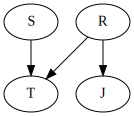

In [6]:
import graphviz as gz

G = gz.Digraph()
G.edge('R', 'T')
G.edge('S', 'T')
G.edge('R', 'J')
G

Parents of node $T$ are the variables that $T$ is dependent ($R$ and $S$).

#### Complete Model
We specify all of the 8 values to complete our model.

$
\begin{align}
    &p(R = 1) &&= 0.2 \\
    &p(S = 1) &&= 0.1 \\
    &p(J = 1 \mid R = 1) &&= 1 \\
    &p(J = 1 \mid R = 0) &&= 0.2 \\
    &p(T = 1 \mid R = 1, S = 0) &&= 1 \\
    &p(T = 1 \mid R = 1, S = 1) &&= 1 \\
    &p(T = 1 \mid R = 0, S = 1) &&= 0.9 \\
    &p(T = 1 \mid R = 0, S = 0) &&= 0 \\
\end{align}
$

which can be written as follows:

In [7]:
"""
   T | 0   1
 R,S |
 -------------
 0,0 | 1   0
 0,1 | 0.1 0.9
 1,0 | 0   1
 1,1 | 0   1
"""

p_R = np.array([0.8, 0.2])
p_S = np.array([0.9, 0.1])
p_J_given_R = np.array([[0.8, 0.2],
                        [0, 1]])
p_T_given_R_S = np.array([[1, 0],
                          [0.1, 0.9],
                          [0, 1],
                          [0, 1]])

#### Inference
After specifying the complete model, we can make inference by manipulating the expressions and using the values we have specified. For example,

$
\begin{align}
    p(S = 1 \mid T = 1, J = 1) &= \sum_R p(S = 1, R \mid T = 1, J = 1) \\
                               &= \frac{\sum_R p(S = 1, R, T = 1, J = 1)}{p(T = 1, J = 1)} \\
                               &= \frac{\sum_R p(S = 1, R, T = 1, J = 1)}{\sum_{R,S} p(T = 1, J = 1, R, S)} \\
                               &= \frac{\sum_R p(T = 1 \mid R, S = 1)p(J = 1 \mid R)p(R)p(S = 1)}{\sum_{R,S} p(T = 1 \mid R, S)p(J = 1 \mid R)p(R)p(S)} \\
\end{align}
$

In [33]:
j1r = p_J_given_R[:, 1]
t1rs1 = p_T_given_R_S[[1, 3], 1]
r = p_R
s1 = p_S[1]
nom = np.sum(j1r*t1rs1*r*s1)

$p(J = 1 \mid R)$ = {{j1r}}

$p(T = 1 \mid R, S = 1)$ = {{t1rs1}}

$p(R)$ = {{r}}

$p(S = 1)$ = {{s1}}

$\sum_R p(J = 1 \mid R)p(T = 1 \mid R, S = 1)p(R)p(S = 1)$ = {{nom}}

In [34]:
j1r1 = p_J_given_R[1, 1]
t1r1s = p_T_given_R_S[2:, 1]
r1 = p_R[1]
s = p_S
j1r0 = p_J_given_R[0, 1]
t1r0s = p_T_given_R_S[:2, 1]
r0 = p_R[0]
denom = np.sum(j1r1*t1r1s*r1*s + j1r0*t1r0s*r0*s)

1. ** R = 1 case **
  * $p(J = 1 \mid R = 1)$ = {{j1r1}}
  * $p(T = 1 \mid R = 1, S)$ = {{t1r1s}}
  * $p(R = 1)$ = {{r1}}
  * $p(S)$ = {{s}}

2. ** R = 0 case **
  * $p(J = 1 \mid R = 0)$ = {{j1r0}}
  * $p(T = 1 \mid R = 0, S)$ = {{t1r0s}}
  * $p(R = 0)$ = {{r0}}
  * $p(S)$ = {{s}}

$\sum_{R,S} p(J = 1 \mid R)p(T = 1 \mid R, S)p(R)p(S)$ = {{denom}}

In [29]:
nom/denom

0.16044776119402987

$p(S = 1 \mid T = 1, J = 1)$ = {{nom/denom}}

### Uncertain Evidence and Jeffrey's Rule
We don't know the exact state of the evidence variable, i.e. we have a probability distribution over the evidence variable. For example, if $dom(x) = \{red, blue, green\}$,
* **certain evidence** would give us a distribution of (0, 1, 0),
* **uncertain evidence** gives us a distribution of (0.2, 0.3, 0.5).

Performing inference with soft evidence can be achieved using Bayes' rule. For example, let our model be $p(x, y)$ and that we have some soft (uncertain) evidence $\tilde{y}$ about the variable $y$. We want to know how our beliefs are going to change with this new evidence, i.e. we want to calculate $p(x \mid \tilde{y})$.

$$
p(x \mid \tilde{y}) = \sum_y p(x, y \mid \tilde{y}) = \sum_y p(x \mid y, \tilde{y})p(y \mid \tilde{y}) = \sum_y p(x \mid y)p(y \mid \tilde{y}).
$$

Here, $p(y = i \mid \tilde{y})$ represents the probability that $y$ is in state $i$ given the soft-evidence. For example, assume $dom(x) = \{red, blue, green\}$ and the soft evidence $\tilde{x}$ gives us the distribution $(0.2, 0.3, 0.5)$. Then, $p(x = blue \mid \tilde{x}) = 0.3$.